#### Imports

In [1]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### Global variables

In [2]:
d_25 = 25
r_25 = d_25/2/1000
area = math.pi*r_25**2

d_257 = 25.7
r_257 = d_257/2/1000
large_area = math.pi*r_257**2

rings = ['O-ring','NAPN','NAP310','PK','KDN','O-ring257','X-ring257']
shapes = ['Circle','Oval','Kidney']

# Remove first 15 data points to avoid deviating starting values
drop_amount = 15 

# 1 - Dynamic leakage test

In [3]:
# The position in the piston where the pressure is compared
values = {
    'O-ring': 37.7,
    'NAPN': 38,
    'NAP310': 37.7,
    'PK': 37.8,
    'KDN': 37.7,
    'O-ring257': 37.7,
    'X-ring257': 37.7,
    'Circle': 36.9,
    'Oval': 38.5,
    'Kidney': 39.3,
}
    
margin = 0.02

In [4]:
dynamic_leakage = {}

for ring in rings:
    ring_df = pd.read_csv(f'./data/dynamic/{ring}.csv',delimiter='\s+',header=None,names=(['Time','A','B','C','Laser(mm)','Pressure(bar)','Force(N)']))
    ring_df.drop(columns=['A','B','C'],index=ring_df.index[range(drop_amount)],axis=1,inplace=True)
    
    # Selecting the data points around the chosen position
    ring_df = ring_df[(ring_df['Laser(mm)'] > (values[ring]-margin)) & (ring_df['Laser(mm)'] < (values[ring]+margin))]

    dynamic_leakage[ring] = {}
    dynamic_leakage[ring]['Time'] = ring_df['Time']/1000
    dynamic_leakage[ring]['Laser(mm)'] = ring_df['Laser(mm)']
    dynamic_leakage[ring]['Pressure(bar)'] = ring_df['Pressure(bar)']/10
    
for shape in shapes:
    shape_df = pd.read_csv(f'./data/dynamic/{shape}.csv',delimiter='\s+',header=None,names=(['Time','A','B','C','Laser(mm)','Pressure(bar)','Force(N)']))
    shape_df.drop(columns=['A','B','C'],index=shape_df.index[range(drop_amount)],axis=1,inplace=True)
    
    # Selecting the data points around the chosen position
    shape_df = shape_df[(shape_df['Laser(mm)'] > (values[shape]-margin)) & (shape_df['Laser(mm)'] < (values[shape]+margin))]

    dynamic_leakage[shape] = {}
    dynamic_leakage[shape]['Time'] = shape_df['Time']/1000
    dynamic_leakage[shape]['Laser(mm)'] = shape_df['Laser(mm)']
    dynamic_leakage[shape]['Pressure(bar)'] = shape_df['Pressure(bar)']/10
    

#### Dynamic leakage plot 25mm

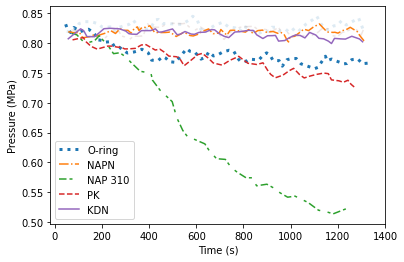

In [5]:
# plt.figure(figsize=(9,5))
plt.plot(dynamic_leakage['O-ring257']['Time'][::4],dynamic_leakage['O-ring257']['Pressure(bar)'].rolling(window=10).mean()[::4],'tab:blue', alpha=0.15, linestyle='dotted',linewidth=3)   
plt.plot(dynamic_leakage['X-ring257']['Time'][::4],dynamic_leakage['X-ring257']['Pressure(bar)'].rolling(window=10).mean()[::4],'tab:brown', alpha=0.15, linestyle=(0,(5,2,2)))
plt.plot(dynamic_leakage['O-ring']['Time'][::4],dynamic_leakage['O-ring']['Pressure(bar)'].rolling(window=10).mean()[::4],'tab:blue',label='O-ring', linestyle='dotted',linewidth=3)
plt.plot(dynamic_leakage['NAPN']['Time'][::4],dynamic_leakage['NAPN']['Pressure(bar)'].rolling(window=10).mean()[::4],'tab:orange',label='NAPN',linestyle='dashdot')
plt.plot(dynamic_leakage['NAP310']['Time'][::4],dynamic_leakage['NAP310']['Pressure(bar)'].rolling(window=10).mean()[::4],'tab:green',label='NAP 310', linestyle=(0,(5,2,2)))
plt.plot(dynamic_leakage['PK']['Time'][::4],dynamic_leakage['PK']['Pressure(bar)'].rolling(window=10).mean()[::4],'tab:red',label='PK',linestyle='dashed')
plt.plot(dynamic_leakage['KDN']['Time'][::4],dynamic_leakage['KDN']['Pressure(bar)'].rolling(window=10).mean()[::4],'tab:purple',label='KDN')

plt.xlabel('Time (s)')
plt.ylabel('Pressure (MPa)')
# plt.title('Dynamic leakage - Pressure drop at specific point in the cylinder')
plt.legend()
plt.savefig('./figures/test_2_dynamic_leakage_25mm.pdf',bbox_inches = 'tight')
plt.clf()


#### Dynamic leakage plot 25.7mm

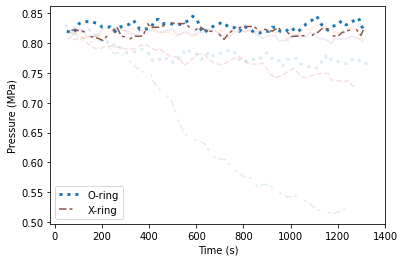

In [6]:
plt.plot(dynamic_leakage['O-ring']['Time'][::4],dynamic_leakage['O-ring']['Pressure(bar)'].rolling(window=10).mean()[::4],'tab:blue', alpha=0.15, linestyle='dotted',linewidth=3)
plt.plot(dynamic_leakage['NAPN']['Time'][::4],dynamic_leakage['NAPN']['Pressure(bar)'].rolling(window=10).mean()[::4],'tab:orange',alpha=0.15,linestyle='dashdot')
plt.plot(dynamic_leakage['NAP310']['Time'][::4],dynamic_leakage['NAP310']['Pressure(bar)'].rolling(window=10).mean()[::4],'tab:green',alpha=0.15, linestyle=(0,(5,2,2)))
plt.plot(dynamic_leakage['PK']['Time'][::4],dynamic_leakage['PK']['Pressure(bar)'].rolling(window=10).mean()[::4],'tab:red',alpha=0.15,linestyle='dashed')
plt.plot(dynamic_leakage['KDN']['Time'][::4],dynamic_leakage['KDN']['Pressure(bar)'].rolling(window=10).mean()[::4],'tab:purple',alpha=0.15)
plt.plot(dynamic_leakage['O-ring257']['Time'][::4],dynamic_leakage['O-ring257']['Pressure(bar)'].rolling(window=10).mean()[::4],'tab:blue',label='O-ring', linestyle='dotted',linewidth=3)  
plt.plot(dynamic_leakage['X-ring257']['Time'][::4],dynamic_leakage['X-ring257']['Pressure(bar)'].rolling(window=10).mean()[::4],'tab:brown',label='X-ring', linestyle=(0,(5,2,2)))
plt.xlabel('Time (s)')
plt.ylabel('Pressure (MPa)')
# plt.title('Dynamic leakage - Pressure drop at specific point in the cylinder')
plt.legend()
plt.savefig('./figures/test_2_dynamic_leakage_257mm.pdf',bbox_inches = 'tight')
plt.clf()


#### Dynamic leakage plot different shapes

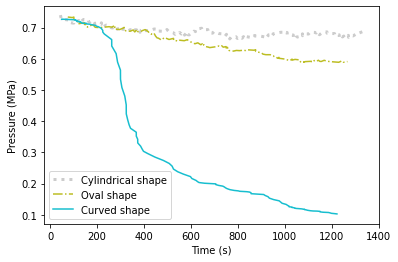

In [7]:
plt.plot(dynamic_leakage['Circle']['Time'],dynamic_leakage['Circle']['Pressure(bar)'].rolling(window=10).mean(),'0.8',label='Cylindrical shape', linestyle='dotted',linewidth=3)   
plt.plot(dynamic_leakage['Oval']['Time'],dynamic_leakage['Oval']['Pressure(bar)'].rolling(window=10).mean(),'tab:olive',label='Oval shape',linestyle='dashdot')   
plt.plot(dynamic_leakage['Kidney']['Time'],dynamic_leakage['Kidney']['Pressure(bar)'].rolling(window=10).mean(),'tab:cyan',label='Curved shape')

plt.xlabel('Time (s)')
plt.ylabel('Pressure (MPa)')
# plt.title('Dynamic leakage - Pressure drop at specific point in the cylinder')
plt.legend()
plt.savefig('./figures/test_2_dynamic_leakage_shapes.pdf',bbox_inches = 'tight')
plt.clf()


# 2 - Static leakage test

In [8]:
static_leakage = {}

for ring in rings:
    ring_df = pd.read_csv(f'./data/static/{ring}.csv',delimiter='\s+',header=None,names=(['Time','A','B','C','Laser(mm)','Pressure(bar)','Force(N)']))
    ring_df.drop(columns=['A','B','C'],index=ring_df.index[range(drop_amount)],axis=1,inplace=True)
    
    static_leakage[ring] = {}
    # Filtering the data with a rolling window and sampling the data
    static_leakage[ring]['Time'] = ring_df['Time'].head(130000).rolling(window=100).mean()[::1000]/1000
    static_leakage[ring]['Pressure(bar)'] = ring_df['Pressure(bar)'].head(130000).rolling(window=100).mean()[::1000]/10
    
for shape in shapes:
    shape_df = pd.read_csv(f'./data/static/{shape}.csv',delimiter='\s+',header=None,names=(['Time','A','B','C','Laser(mm)','Pressure(bar)','Force(N)']))
    shape_df.drop(columns=['A','B','C'],index=shape_df.index[range(drop_amount)],axis=1,inplace=True)

    static_leakage[shape] = {}
    # Filtering the data with a rolling window and sampling the data
    static_leakage[shape]['Time'] = shape_df['Time'].head(130000).rolling(window=100).mean()[::1000]/1000
    static_leakage[shape]['Pressure(bar)'] = shape_df['Pressure(bar)'].head(130000).rolling(window=100).mean()[::1000]/10
    

#### Static leakage plot 25mm

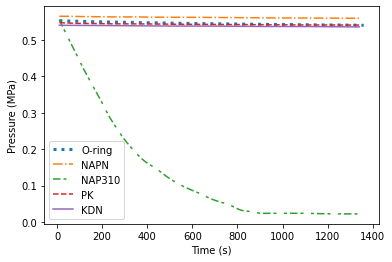

In [9]:
plt.plot(static_leakage['O-ring']['Time'],static_leakage['O-ring']['Pressure(bar)'],'tab:blue',label='O-ring',linestyle='dotted',linewidth=3)    
plt.plot(static_leakage['NAPN']['Time'],static_leakage['NAPN']['Pressure(bar)'],'tab:orange',label='NAPN',linestyle='dashdot')
plt.plot(static_leakage['NAP310']['Time'],static_leakage['NAP310']['Pressure(bar)'],'tab:green',label='NAP310', linestyle=(0,(5,2,2)))
plt.plot(static_leakage['PK']['Time'],static_leakage['PK']['Pressure(bar)'],'tab:red',label='PK',linestyle='dashed')
plt.plot(static_leakage['KDN']['Time'],static_leakage['KDN']['Pressure(bar)'],'tab:purple',label='KDN')

plt.xlabel('Time (s)')
plt.ylabel('Pressure (MPa)')
plt.legend()
plt.savefig('./figures/test_2_static_leakage.pdf',bbox_inches = 'tight')
plt.clf()


#### Static leakage plot 25mm (without NAP310 for clarity)

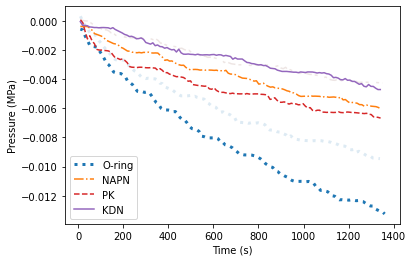

In [10]:
# Substracting the initial pressure from the data to account for pressure drop
O_statleakage_pressuredrop = static_leakage['O-ring']['Pressure(bar)'] - 0.554
NAPN_statleakage_pressuredrop = static_leakage['NAPN']['Pressure(bar)'] - 0.566
PK_statleakage_pressuredrop = static_leakage['PK']['Pressure(bar)'] - 0.548
KDN_statleakage_pressuredrop = static_leakage['KDN']['Pressure(bar)'] - 0.541
O_257_statleakage_pressuredrop = static_leakage['O-ring257']['Pressure(bar)'] - 0.546
X_257_statleakage_pressuredrop = static_leakage['X-ring257']['Pressure(bar)'] - 0.542

plt.plot(static_leakage['O-ring257']['Time'],O_257_statleakage_pressuredrop,'tab:blue',alpha=0.15, linestyle='dotted',linewidth=3)
plt.plot(static_leakage['X-ring257']['Time'],X_257_statleakage_pressuredrop,'tab:brown',alpha=0.15, linestyle=(0,(5,2,2)))
plt.plot(static_leakage['O-ring']['Time'],O_statleakage_pressuredrop,'tab:blue',label='O-ring',linestyle='dotted',linewidth=3)   
plt.plot(static_leakage['NAPN']['Time'],NAPN_statleakage_pressuredrop,'tab:orange',label='NAPN',linestyle='dashdot')
plt.plot(static_leakage['PK']['Time'],PK_statleakage_pressuredrop,'tab:red',label='PK',linestyle='dashed')
plt.plot(static_leakage['KDN']['Time'],KDN_statleakage_pressuredrop,'tab:purple',label='KDN')
plt.xlabel('Time (s)')
plt.ylabel('Pressure (MPa)')
plt.legend()
plt.savefig('./figures/test_2_static_leakage_part.pdf',bbox_inches = 'tight')
plt.clf()


#### Static leakage plot 25.7mm (without NAP310 for clarity)

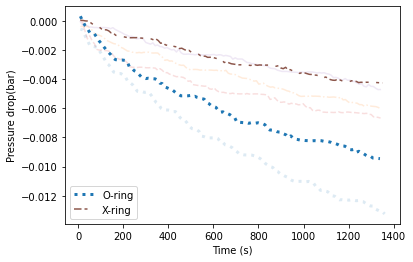

In [11]:
plt.plot(static_leakage['O-ring']['Time'],O_statleakage_pressuredrop,'tab:blue',alpha=0.15, linestyle='dotted',linewidth=3)
plt.plot(static_leakage['NAPN']['Time'],NAPN_statleakage_pressuredrop,'tab:orange',alpha=0.15,linestyle='dashdot')
plt.plot(static_leakage['PK']['Time'],PK_statleakage_pressuredrop,'tab:red',alpha=0.15,linestyle='dashed')  
plt.plot(static_leakage['KDN']['Time'],KDN_statleakage_pressuredrop,'tab:purple',alpha=0.15)
plt.plot(static_leakage['O-ring257']['Time'],O_257_statleakage_pressuredrop,'tab:blue',label='O-ring',linestyle='dotted',linewidth=3)
plt.plot(static_leakage['X-ring257']['Time'],X_257_statleakage_pressuredrop,'tab:brown',label='X-ring',linestyle=(0,(5,2,2)))

plt.xlabel('Time (s)')
plt.ylabel('Pressure drop(bar)')
plt.legend(loc=3)
plt.savefig('./figures/test_2_static_leakage_257.pdf',bbox_inches = 'tight')
plt.clf()


#### Static leakage plot different shapes

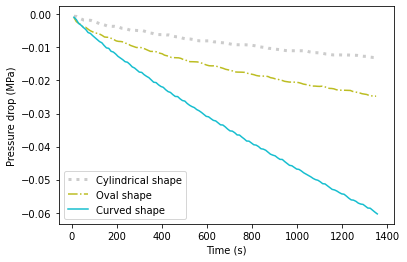

In [12]:
# Substracting the initial pressure from the data to account for pressure drop
circle_statleakage_pressuredrop = static_leakage['Circle']['Pressure(bar)'] - 0.554
ovaal_statleakage_pressuredrop = static_leakage['Oval']['Pressure(bar)'] - 0.565
kidney_statleakage_pressuredrop = static_leakage['Kidney']['Pressure(bar)'] - 0.543

plt.plot(static_leakage['Circle']['Time'],circle_statleakage_pressuredrop,'0.8',label='Cylindrical shape', linestyle='dotted',linewidth=3)  
plt.plot(static_leakage['Oval']['Time'],ovaal_statleakage_pressuredrop,'tab:olive',label='Oval shape',linestyle='dashdot')
plt.plot(static_leakage['Kidney']['Time'],kidney_statleakage_pressuredrop,'tab:cyan',label='Curved shape')

plt.xlabel('Time (s)')
plt.ylabel('Pressure drop (MPa)')
plt.legend()
plt.savefig('./figures/test_2_static_leakage_shapes.pdf',bbox_inches = 'tight')
plt.clf()


# 3 - Friction force test

In [13]:
friction_force = {}

for ring in rings:
    friction_force[ring] = {}
    for bar in [1,3,5,7]:
        ring_df = pd.read_csv(f'./data/friction/{ring}_{bar}bar.csv',delimiter='\s+',header=None,names=(['Time','A','B','C','Laser(mm)','Pressure(bar)','Force(N)']))
        ring_df.drop(columns=['A','B','C'],index=ring_df.index[range(drop_amount)],axis=1,inplace=True)

        friction_force[ring][bar] = {}
        friction_force[ring][bar]['Time'] = ring_df['Time']/1000
        friction_force[ring][bar]['Laser(mm)'] = ring_df['Laser(mm)']
        friction_force[ring][bar]['Pressure(bar)'] = ring_df['Pressure(bar)']/10
        friction_force[ring][bar]['Force(N)'] = ring_df['Force(N)']
        
        # The 25.7mm rings have a different and larger surface area
        if '257' in ring:
            Fp = ring_df['Pressure(bar)'] * 10**5 * large_area
        else:
            Fp = ring_df['Pressure(bar)'] * 10**5 * area
            
        FF = ring_df['Force(N)'] - Fp
        friction_force[ring][bar]['FrictionForce'] = FF      
        friction_force[ring][bar]['FrictionFrom'] = FF[FF>0].mean()
        friction_force[ring][bar]['FrictionTo'] = FF[FF<0].mean()
        # Defining the friction force range
        friction_force[ring][bar]['FrictionRange'] = friction_force[ring][bar]['FrictionFrom'] - friction_force[ring][bar]['FrictionTo']


for shape in shapes:
    friction_force[shape] = {}
    for bar in [1,2,3]:
        # try-catch exception to avoid one (still to be executed) test - Circle, 2 bar
        try:
            shape_df = pd.read_csv(f'./data/friction/{shape}_{bar}bar.csv',delimiter='\s+',header=None,names=(['Time','A','B','C','Laser(mm)','Pressure(bar)','Force(N)']))
            shape_df.drop(columns=['A','B','C'],index=shape_df.index[range(drop_amount)],axis=1,inplace=True)

            friction_force[shape][bar] = {}
            friction_force[shape][bar]['Time'] = shape_df['Time']/1000
            friction_force[shape][bar]['Laser(mm)'] = shape_df['Laser(mm)']
            friction_force[shape][bar]['Pressure(bar)'] = shape_df['Pressure(bar)']/10
            friction_force[shape][bar]['Force(N)'] = shape_df['Force(N)']
        
            Fp = shape_df['Pressure(bar)'] * 10**5 *area
            FF = shape_df['Force(N)'] - Fp

            friction_force[shape][bar]['FrictionForce'] = FF      
            friction_force[shape][bar]['FrictionFrom'] = FF[FF>0].mean()
            friction_force[shape][bar]['FrictionTo'] = FF[FF<0].mean()
            # Defining the friction force range
            friction_force[shape][bar]['FrictionRange'] = friction_force[shape][bar]['FrictionFrom'] - friction_force[shape][bar]['FrictionTo']
        except Exception as e:
            print(e)
            

[Errno 2] No such file or directory: './data/friction/Circle_2bar.csv'


#### Friction force 1 bar plot

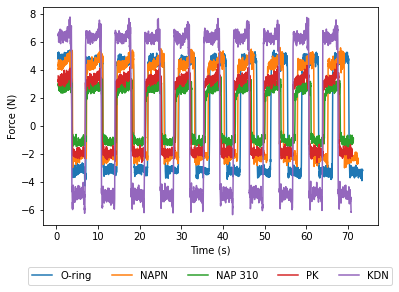

In [14]:
plt.plot(friction_force['O-ring'][1]['Time'],friction_force['O-ring'][1]['FrictionForce'],'tab:blue',label='O-ring')
plt.plot(friction_force['NAPN'][1]['Time'],friction_force['NAPN'][1]['FrictionForce'],'tab:orange',label='NAPN')
plt.plot(friction_force['NAP310'][1]['Time'],friction_force['NAP310'][1]['FrictionForce'],'tab:green',label='NAP 310')
plt.plot(friction_force['PK'][1]['Time'],friction_force['PK'][1]['FrictionForce'],'tab:red',label='PK')
plt.plot(friction_force['KDN'][1]['Time'],friction_force['KDN'][1]['FrictionForce'],'tab:purple',label='KDN')

plt.xlabel('Time (s)')
plt.ylabel('Force (N)')

plt.legend(loc='lower center',bbox_to_anchor=(0.5,-0.3),ncol=5)

plt.savefig('./figures/frictionforce_1bar.pdf',bbox_inches = 'tight')
plt.clf()


#### Friction force range definement plot

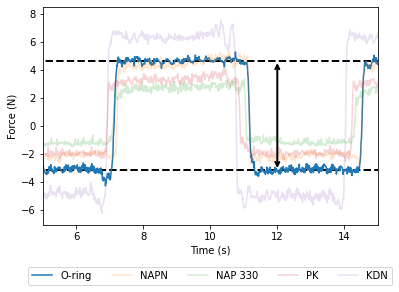

In [15]:
plt.annotate(text='',xy=(12,friction_force['O-ring'][1]['FrictionFrom']), xytext=(12,friction_force['O-ring'][1]['FrictionTo']), arrowprops=dict(arrowstyle='<->', lw=2))
plt.hlines(xmin=0, xmax=70,y=friction_force['O-ring'][1]['FrictionFrom'], linestyles='dashed', colors='0', lw=2)
plt.hlines(xmin=0, xmax=70,y=friction_force['O-ring'][1]['FrictionTo'], linestyles='dashed', colors='0', lw=2)
plt.plot(friction_force['O-ring'][1]['Time'],friction_force['O-ring'][1]['FrictionForce'],'tab:blue',label='O-ring')
plt.plot(friction_force['NAPN'][1]['Time'],friction_force['NAPN'][1]['FrictionForce'],'tab:orange',alpha=0.2,label='NAPN')
plt.plot(friction_force['NAP310'][1]['Time'],friction_force['NAP310'][1]['FrictionForce'],'tab:green',alpha=0.2,label='NAP 330')
plt.plot(friction_force['PK'][1]['Time'],friction_force['PK'][1]['FrictionForce'],'tab:red',alpha=0.2,label='PK')
plt.plot(friction_force['KDN'][1]['Time'],friction_force['KDN'][1]['FrictionForce'],'tab:purple', alpha=0.2,label='KDN')


plt.xlim([5,15])
plt.xlabel('Time (s)')
plt.ylabel('Force (N)')
plt.legend(loc='lower center',bbox_to_anchor=(0.5,-0.3),ncol=5)

plt.savefig('./figures/frictionforce_1bar_zoom.pdf',bbox_inches = 'tight')
plt.clf()


#### Amplitude friction plot 25mm

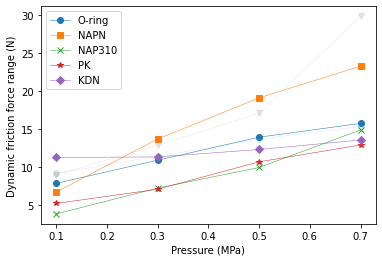

In [16]:
fr = {'Pressure': [.1,.3,.5,.7],
     'O_ring': [friction_force['O-ring'][1]['FrictionRange'],friction_force['O-ring'][3]['FrictionRange'],friction_force['O-ring'][5]['FrictionRange'],friction_force['O-ring'][7]['FrictionRange']],
     'NAPN': [friction_force['NAPN'][1]['FrictionRange'],friction_force['NAPN'][3]['FrictionRange'],friction_force['NAPN'][5]['FrictionRange'],friction_force['NAPN'][7]['FrictionRange']],
     'NAP310': [friction_force['NAP310'][1]['FrictionRange'],friction_force['NAP310'][3]['FrictionRange'],friction_force['NAP310'][5]['FrictionRange'],friction_force['NAP310'][7]['FrictionRange']],
     'PK': [friction_force['PK'][1]['FrictionRange'],friction_force['PK'][3]['FrictionRange'],friction_force['PK'][5]['FrictionRange'],friction_force['PK'][7]['FrictionRange']],
     'KDN': [friction_force['KDN'][1]['FrictionRange'],friction_force['KDN'][3]['FrictionRange'],friction_force['KDN'][5]['FrictionRange'],friction_force['KDN'][7]['FrictionRange']],
     'O_ring257': [friction_force['O-ring257'][1]['FrictionRange'],friction_force['O-ring257'][3]['FrictionRange'],friction_force['O-ring257'][5]['FrictionRange'],friction_force['O-ring257'][7]['FrictionRange']],
     'X_ring257': [friction_force['X-ring257'][1]['FrictionRange'],friction_force['X-ring257'][3]['FrictionRange'],friction_force['X-ring257'][5]['FrictionRange'],friction_force['X-ring257'][7]['FrictionRange']]
    }
frictie_range = pd.DataFrame(data=fr)

plt.plot(frictie_range.Pressure,frictie_range.O_ring257,marker='o',color='tab:blue',alpha=0.15,linewidth=0.5)
plt.plot(frictie_range.Pressure,frictie_range.X_ring257,marker='v',color='tab:brown',alpha=0.15,linewidth=0.5)
plt.plot(frictie_range.Pressure,frictie_range.O_ring,marker='o',color='tab:blue',label='O-ring',linewidth=0.5)
plt.plot(frictie_range.Pressure,frictie_range.NAPN,marker='s',color='tab:orange',label='NAPN',linewidth=0.5)
plt.plot(frictie_range.Pressure,frictie_range.NAP310,marker='x',color='tab:green',label='NAP310',linewidth=0.5)
plt.plot(frictie_range.Pressure,frictie_range.PK,marker='*',color='tab:red',label='PK',linewidth=0.5)
plt.plot(frictie_range.Pressure,frictie_range.KDN,marker='D',color='tab:purple',label='KDN',linewidth=0.5)
plt.xlabel('Pressure (MPa)')
plt.ylabel('Dynamic friction force range (N)')

plt.legend()
plt.savefig('./figures/test_3_results_frictionforcerange_25mm.pdf',bbox_inches = 'tight')
plt.clf()


#### Amplitude friction plot 25.7mm

In [17]:
# !! ---- Final test with Circle on 2 bar stil needs to be done ---- !!
friction_force['Circle'][2] = {}
friction_force['Circle'][2]['FrictionRange'] = np.sum(friction_force['Circle'][1]['FrictionRange']+friction_force['Circle'][3]['FrictionRange'])/2


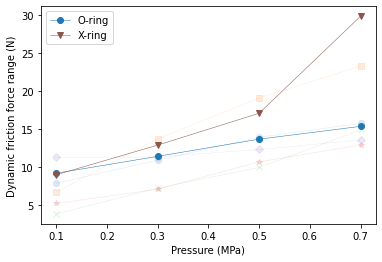

In [18]:
plt.plot(frictie_range.Pressure,frictie_range.O_ring,marker='o',color='tab:blue',alpha=0.15,linewidth=0.5)
plt.plot(frictie_range.Pressure,frictie_range.NAPN,marker='s',color='tab:orange',alpha=0.15,linewidth=0.5)
plt.plot(frictie_range.Pressure,frictie_range.NAP310,marker='x',color='tab:green',alpha=0.15,linewidth=0.5)
plt.plot(frictie_range.Pressure,frictie_range.PK,marker='*',color='tab:red',alpha=0.15,linewidth=0.5)
plt.plot(frictie_range.Pressure,frictie_range.KDN,marker='D',color='tab:purple',alpha=0.15,linewidth=0.5)
plt.plot(frictie_range.Pressure,frictie_range.O_ring257,marker='o',color='tab:blue',label='O-ring',linewidth=0.5)
plt.plot(frictie_range.Pressure,frictie_range.X_ring257,marker='v',color='tab:brown',label='X-ring',linewidth=0.5)
plt.xlabel('Pressure (MPa)')
plt.ylabel('Dynamic friction force range (N)')

plt.legend()
plt.savefig('./figures/test_3_results_frictionforcerange_257mm.pdf',bbox_inches = 'tight')
plt.clf()


####  Amplitude friction plot different shapes

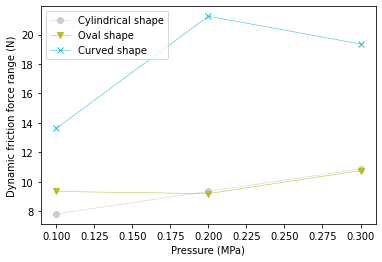

In [19]:
fr = {'Pressure': [.1,.2,.3],
     'Circle': [friction_force['Circle'][1]['FrictionRange'],friction_force['Circle'][2]['FrictionRange'],friction_force['Circle'][3]['FrictionRange']],
     'Oval': [friction_force['Oval'][1]['FrictionRange'],friction_force['Oval'][2]['FrictionRange'],friction_force['Oval'][3]['FrictionRange']],
     'Kidney': [friction_force['Kidney'][1]['FrictionRange'],friction_force['Kidney'][2]['FrictionRange'],friction_force['Kidney'][3]['FrictionRange']],
    }

frictie_range = pd.DataFrame(data=fr)

plt.plot(frictie_range.Pressure,frictie_range.Circle,marker='o',color='0.8',label='Cylindrical shape',linewidth=0.5)
plt.plot(frictie_range.Pressure,frictie_range.Oval,marker='v',color='tab:olive', label='Oval shape',linewidth=0.5)
plt.plot(frictie_range.Pressure,frictie_range.Kidney,marker='x',color='tab:cyan', label='Curved shape',linewidth=0.5)

plt.xlabel('Pressure (MPa)')
plt.ylabel('Dynamic friction force range (N)')

plt.legend(loc=2)
plt.savefig('./figures/test_3_results_frictionforcerange_shape.pdf',bbox_inches = 'tight')
plt.clf()
